# Machine Learning: Homework 2
## Jose Vazquez-Espinoza

codigo y libreria en: https://github.com/joseluisvaz/machine_learning_itesm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#Import own library
import ML_Algorithms.LinearMethods as lm
import ML_Algorithms.GradientDescent as gd


## Part 1: Gradient Descent

Here, we are going to plot our linearly separable classes and use linear classification

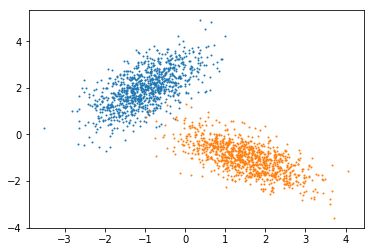

In [2]:
std = [[0.5, 0.4], [0.4,0.7]]
std2 = [[0.7, -0.4], [-0.4,0.5]]
c1 = np.random.multivariate_normal([-1, 2], std, 1000);
c2 = np.random.multivariate_normal([1.5, -1], std2, 1000);
X = np.concatenate([c1,c2])

labels = np.ones(1000)
labels2 = -1 * np.ones(1000)
Y = np.concatenate([labels, labels2])

plt.scatter(c1[:,0], c1[:,1], s=1)
plt.scatter(c2[:,0], c2[:,1], s=1)
plt.show()

Here we are going to use gradient descent for the solution

In [14]:
#Creating a classifier 

clf = gd.GradientClassifier()
clf.fit(X, Y, step="fixed", reg=0, 
        print_iter=False, step_size= 0.01, max_iter = 1000)
clf.coef

array([-0.09844429, -0.28715043,  0.34228242])

In this plot we can see the path that the coefficients are following with the graddient descent

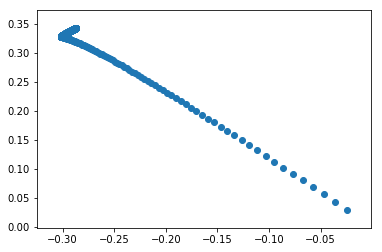

In [15]:
plt.scatter(clf.list_coef[2:,1], clf.list_coef[2:,2])
plt.show()

A search for the steepest  descent was implemented but the convergence was slow

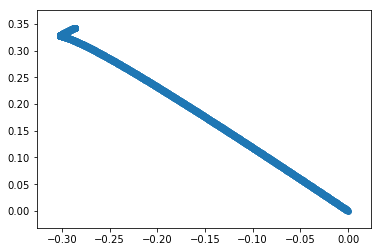

In [21]:
clf.fit(X, Y, step="golden", reg=0, 
        print_iter=False, max_iter=1500)
clf.coef
plt.scatter(clf.list_coef[2:,1], clf.list_coef[2:,2])
plt.show()

The theta values are the same as the cannonical solutions

In [22]:
clf2classes = lm.LinearClassifier()
clf2classes.fit(X, Y, reg = 0)

clf2classes.coef

array([-0.09934555, -0.28633566,  0.34298904])

Wrapping the method and  trying regularization values from 0 to 100 in unit increments, we can observe that the parameters want go far away from the singularity, thats the main objective of ridge regularization, this will also give us the  advantage of not performing overffiting. We would need a validation set to calculate the mean square error

In [26]:
coefs = []
for i in range(0,100):
    clf.fit(X, Y, step="fixed", reg=i,
            step_size= 0.0001, max_iter=1000)
    coefs.append(clf.coef)

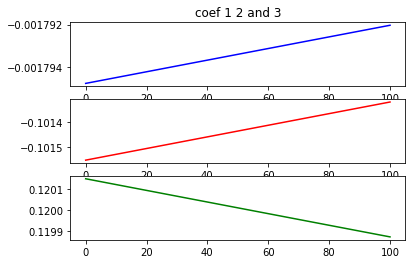

In [28]:
coefs = np.array(coefs)
l = np.linspace(0, 100,100)

plt.subplot(3, 1, 1)
plt.plot(l, coefs[:,0], 'b')
plt.title('coef 1 2 and 3')

plt.subplot(3, 1, 2)
plt.plot(l, coefs[:,1], 'r')
plt.subplot(3, 1, 3)
plt.plot(l, coefs[:,2], 'g')


plt.show()

## Part 2: Fisher Linear Discriminant

In this part we are going to implement the Fisher Linear discriminant for two classes. First we will need the covariance between classes and the covariance within-classes